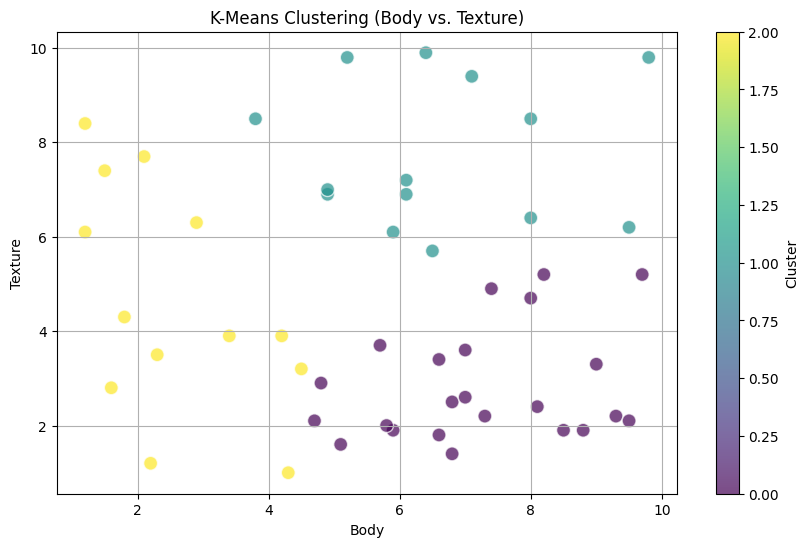

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('random_data1.csv')

# 입력 변수 설정
X = df[['body', 'texture', 'sweetness']]

# KMeans 클러스터링 모델 생성 및 학습
kmeans = KMeans(n_clusters=3, random_state=0)  # 클러스터 수를 3으로 설정
clusters = kmeans.fit_predict(X)

# 클러스터 결과를 원본 데이터에 추가
df['Cluster'] = clusters

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['body'], df['texture'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7, edgecolors='w')
plt.title('K-Means Clustering (Body vs. Texture)')
plt.xlabel('Body')
plt.ylabel('Texture')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


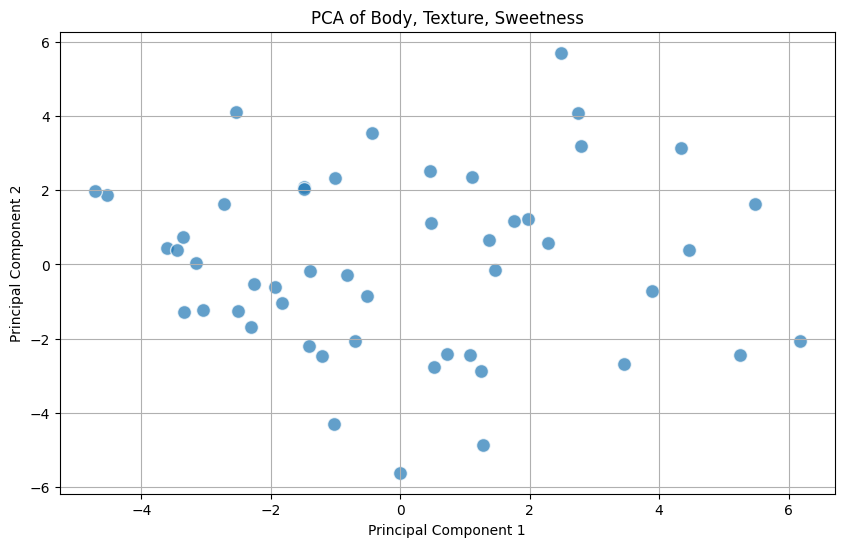

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 모델 생성
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA 결과를 DataFrame으로 변환
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# PCA 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7, edgecolors='w', s=100)
plt.title('PCA of Body, Texture, Sweetness')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


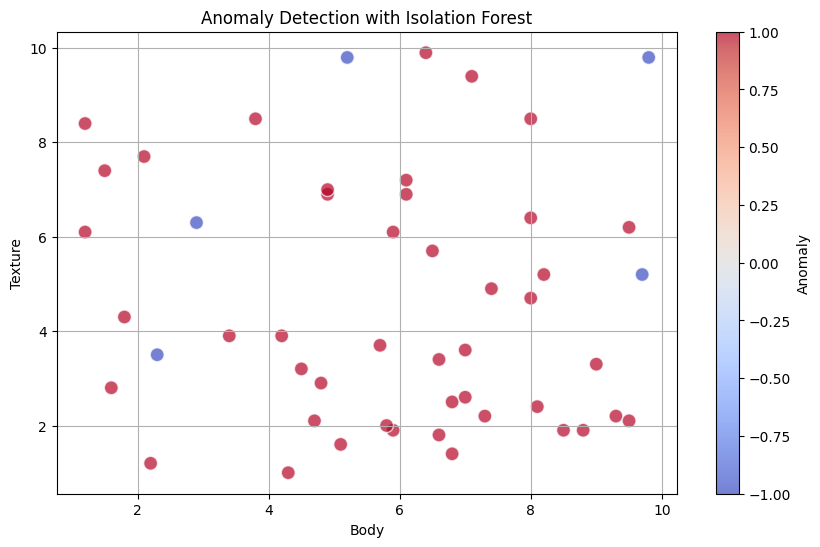

In [3]:
from sklearn.ensemble import IsolationForest

# Isolation Forest 모델 생성
iso_forest = IsolationForest(contamination=0.1, random_state=0)  # 이상치 비율을 10%로 설정
y_pred = iso_forest.fit_predict(X)

# 이상치 결과를 원본 데이터에 추가
df['Anomaly'] = y_pred

# 이상치 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['body'], df['texture'], c=df['Anomaly'], cmap='coolwarm', s=100, alpha=0.7, edgecolors='w')
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Body')
plt.ylabel('Texture')
plt.colorbar(label='Anomaly')
plt.grid(True)
plt.show()
